In [1]:
# Skip this cell if you already have duckduckgo_search installed
!pip install -Uqq duckduckgo_search

In [2]:
!pip install fastbook

^C


In [3]:
!pip install fastcore


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 719.8/719.8 kB 1.0 MB/s eta 0:00:00
     -------------------------------------- 233.1/233.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 10.6/10.6 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 7.1/7.1 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 474.6/474.6 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 123.9/123.9 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 977.5/977.5 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 42.2


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:

from fastbook import search_images_ddg
urls = search_images_ddg('bird photos', max_images=1)
urls[0]

'https://c.pxhere.com/photos/25/39/bird_bluebird_perching_bluebird_bluebird_on_perch_nature_blue_animal-1382590.jpg!d'

In [5]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

Path('bird.jpg')

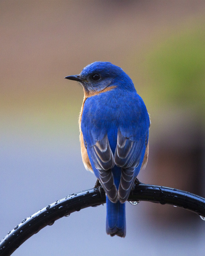

In [6]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

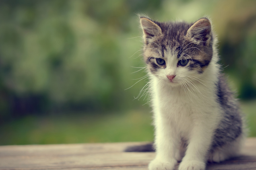

In [20]:
download_url(search_images_ddg('cat photos', max_images=1)[0], 'cat.jpg', show_progress=False)
Image.open('cat.jpg').to_thumb(256,256)

In [9]:
searches = 'bird','cat','horse','tiger','lion','dog','koala','kangaroo','dolphin','panda'
path = Path('bird_or_not')
from time import sleep

In [12]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images_ddg(f'{o} animal photo'))
    sleep(10)
    download_images(dest, urls=search_images_ddg(f'{o} secondanimal photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [13]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

174

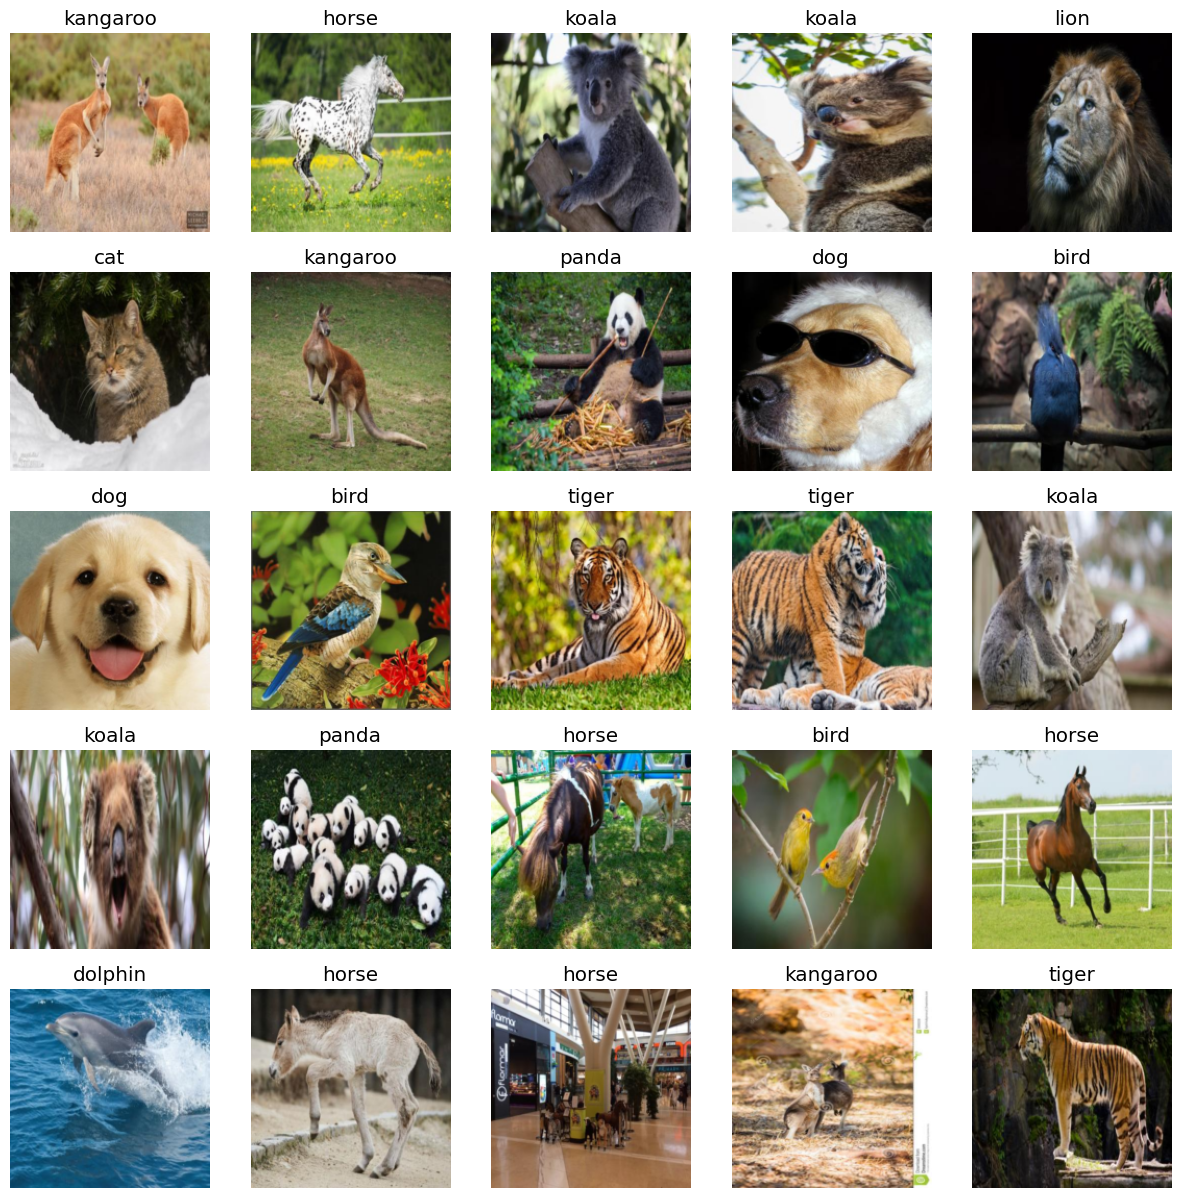

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=25)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

D:\Program Files\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Program Files\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Administrator/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:14<00:00, 3.16MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.726858,0.279349,0.075199,07:55


epoch,train_loss,valid_loss,error_rate,time
0,0.240272,0.253133,0.058568,10:37
1,0.111582,0.244752,0.054953,10:21
2,0.044206,0.240026,0.053507,10:23


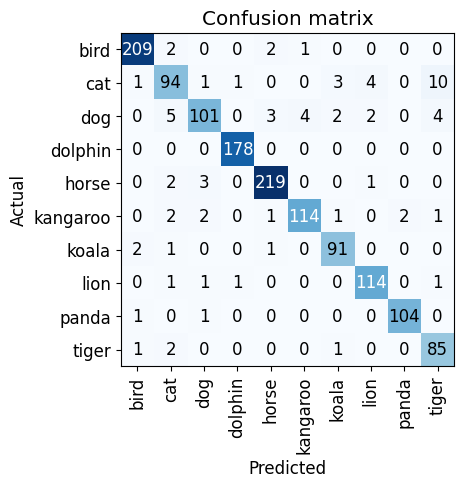

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [18]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
